# Assignment 1: Image Filtering and Edge Detection

ECSE 415 Introduction to Computer Vision

Instructor: James Clark

Ann Trinh 260985522

In [1]:
path = '/content/drive/My Drive/McGill Jazz/Courses/ECSE 415/'

In [2]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importing libraries used throughout the assignment
import matplotlib.pyplot as plt
import cv2
import numpy as np

## 1 Image Acquisition

In [4]:
# read and convert images to RGB
image_A = cv2.imread(path + 'Image_A.jpg')
image_B = cv2.imread(path + 'Image_B.jpg')

image_A_rgb = cv2.cvtColor(image_A, cv2.COLOR_BGR2RGB)
image_B_rgb = cv2.cvtColor(image_B, cv2.COLOR_BGR2RGB)

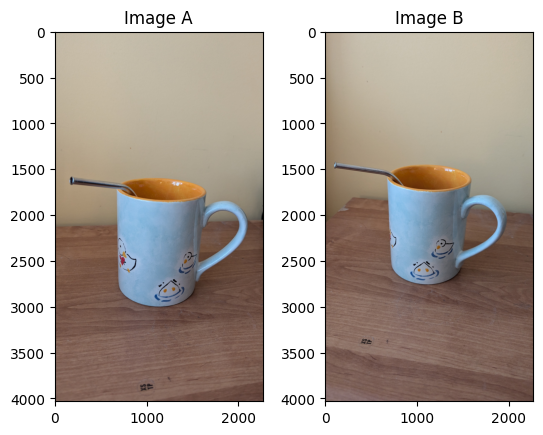

In [5]:
# display images
plt.subplot(121), plt.imshow(image_A_rgb)
plt.title("Image A")
plt.subplot(122), plt.imshow(image_B_rgb)
plt.title("Image B")
plt.show()

## 2 Convert to Grayscale

The provided Python statment:
```
gray_<A|B> = np.dot(your_image[...,:3], [0.2989, 0.5870, 0.1140])
```
is used to covert a RGB color image into a grayscale image.


This statement does the conversion by applying a the dot product on two arrays. The first array is ```your_image[...,:3]``` which is a 3D array that extracts the RGB values of every pixel in the image. The second array is ```[0.2989, 0.5870, 0.1140]``` which is the weights that is applied to the corresponding color channel.

To get a grayscale value for a single pixel the formula that is being used looks like the following:
```
gray[y,x] = (R * 0.2989) + (G * 0.5870) + (B * 0.1140)
```

In [6]:
# converting to grayscale by manipulating each pixel
gray_A = np.dot(image_A_rgb[...,:3], [0.2989, 0.5870, 0.1140])
gray_B = np.dot(image_B_rgb[...,:3], [0.2989, 0.5870, 0.1140])

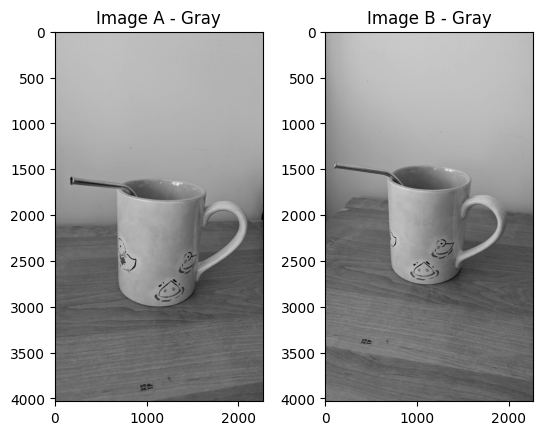

In [7]:
plt.subplot(121), plt.imshow(gray_A, cmap='gray')
plt.title("Image A - Gray")
plt.subplot(122), plt.imshow(gray_B, cmap='gray')
plt.title("Image B - Gray")
plt.show()

## 3 Resize the images

In [8]:
from skimage.transform import resize

def resize_img(img):
  scale_factor = 0

  # identifying the largest dimension and getting the scale factor
  if img.shape[0] > img.shape[1]:
    scale_factor = 256.0 / img.shape[0]
  else:
    scale_factor = 256.0 / img.shape[1]

  # resize using the calculated scale factor
  resized = resize(
    img, (img.shape[0] * scale_factor, img.shape[1] * scale_factor), anti_aliasing=True
  )

  return resized

In [9]:
# apply resize to images
resized_A = resize_img(image_A_rgb)
resized_B = resize_img(image_B_rgb)
resized_A_gray = resize_img(gray_A)
resized_B_gray = resize_img(gray_B)

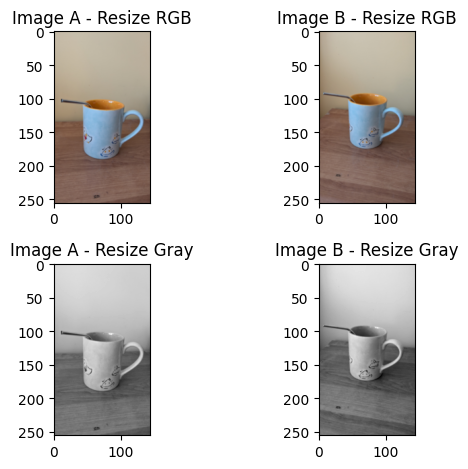

In [10]:
plt.subplot(221), plt.imshow(resized_A)
plt.title("Image A - Resize RGB")
plt.subplot(222), plt.imshow(resized_B)
plt.title("Image B - Resize RGB")
plt.subplot(223), plt.imshow(resized_A_gray, cmap='gray')
plt.title("Image A - Resize Gray")
plt.subplot(224), plt.imshow(resized_B_gray, cmap='gray')
plt.title("Image B - Resize Gray")
plt.tight_layout()
plt.show()

## 4 Smooth the images using Gaussian smoothing

In [11]:
# general convolution code, taking image and kernel as input
def convolve_img(img, kernel):
  kernel_size = kernel.shape[0]

  # padding the image
  pad_size = np.floor(kernel_size / 2).astype("uint8")
  pad_input_img = np.pad(
      img,
      pad_width=int(pad_size),
      mode='constant',
      constant_values=0
  )

  height, width = pad_input_img.shape

  # initialize the output image with the same shape as the original image
  output_img = np.zeros_like(img)

  # traverse through the padded image and calculate for each pixel
  for i in range(0, height - 2 * pad_size):
    for j in range(0, width - 2 * pad_size):
      # get the current pixel region
      region = pad_input_img[i:i + kernel_size, j:j + kernel_size]

      # calculate the convolution
      output_img[i, j] = np.sum(region * kernel)

  return output_img

In [12]:
# calculating for a gaussian kernel, taking kernel size and sigma as input
def create_gaussian_kernel(dimension, sigma):
  center = dimension // 2
  kernel = np.empty((dimension, dimension))

  for i in range(dimension):
    for j in range(dimension):
      exp = (((i - center) ** 2) + ((j - center) ** 2))/(2.0 * (sigma ** 2))
      kernel[i, j] = (1.0 / (2.0 * np.pi * (sigma ** 2))) * np.exp(-exp)

  return kernel

### Using 5x5 pixel Gaussian kernel

[[0.01133856 0.01339492 0.01416015 0.01339492 0.01133856]
 [0.01339492 0.01582423 0.01672824 0.01582423 0.01339492]
 [0.01416015 0.01672824 0.01768388 0.01672824 0.01416015]
 [0.01339492 0.01582423 0.01672824 0.01582423 0.01339492]
 [0.01133856 0.01339492 0.01416015 0.01339492 0.01133856]]


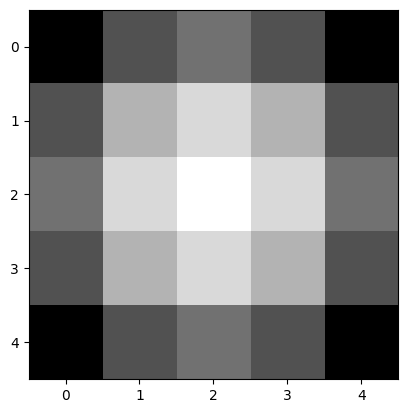

In [13]:
# creating 5x5 kernel
kernel_five = create_gaussian_kernel(5, 3)
print(kernel_five)
plt.imshow(kernel_five, cmap='gray')

In [14]:
# apply the smoothing 5x5 kernel to resized images
smooth_A_five = convolve_img(resized_A_gray, kernel_five)
smooth_B_five = convolve_img(resized_B_gray, kernel_five)

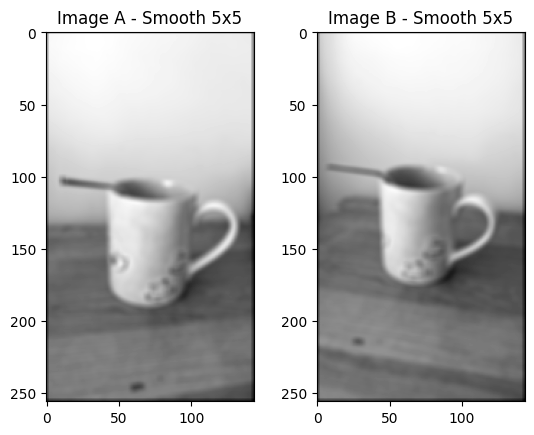

In [15]:
# display smoothed images
plt.subplot(121), plt.imshow(smooth_A_five, cmap='gray')
plt.title("Image A - Smooth 5x5")
plt.subplot(122), plt.imshow(smooth_B_five, cmap='gray')
plt.title("Image B - Smooth 5x5")
plt.show()

### Using 15x15 pixel Gaussian kernel

Note that there is very little visible blurring for the size of the kernel in comparison to the size of the original image which is of size 4032 x 2268.

[[0.00115647 0.00128009 0.00139497 0.00149658 0.0015807  0.00164367
  0.00168265 0.00169585 0.00168265 0.00164367 0.0015807  0.00149658
  0.00139497 0.00128009 0.00115647]
 [0.00128009 0.00141693 0.00154409 0.00165656 0.00174968 0.00181938
  0.00186252 0.00187713 0.00186252 0.00181938 0.00174968 0.00165656
  0.00154409 0.00141693 0.00128009]
 [0.00139497 0.00154409 0.00168265 0.00180522 0.00190669 0.00198265
  0.00202966 0.00204558 0.00202966 0.00198265 0.00190669 0.00180522
  0.00168265 0.00154409 0.00139497]
 [0.00149658 0.00165656 0.00180522 0.00193672 0.00204558 0.00212707
  0.00217751 0.00219459 0.00217751 0.00212707 0.00204558 0.00193672
  0.00180522 0.00165656 0.00149658]
 [0.0015807  0.00174968 0.00190669 0.00204558 0.00216057 0.00224663
  0.00229991 0.00231795 0.00229991 0.00224663 0.00216057 0.00204558
  0.00190669 0.00174968 0.0015807 ]
 [0.00164367 0.00181938 0.00198265 0.00212707 0.00224663 0.00233613
  0.00239153 0.00241029 0.00239153 0.00233613 0.00224663 0.00212707
  0.

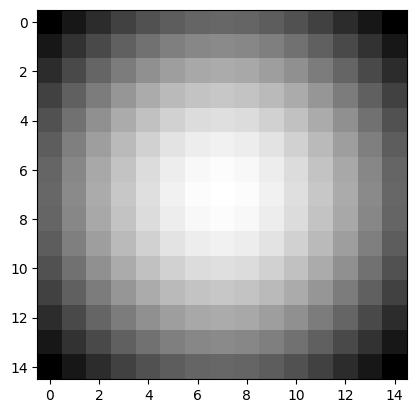

In [16]:
# create 15x15 kernel
kernel_fifteen = create_gaussian_kernel(15, 8)
print(kernel_fifteen)
plt.imshow(kernel_fifteen, cmap='gray')

In [17]:
# apply smoothing 15x15 kernel to original sized grayscale images
smooth_A_fifteen = convolve_img(gray_A, kernel_fifteen)
smooth_B_fifteen = convolve_img(gray_B, kernel_fifteen)

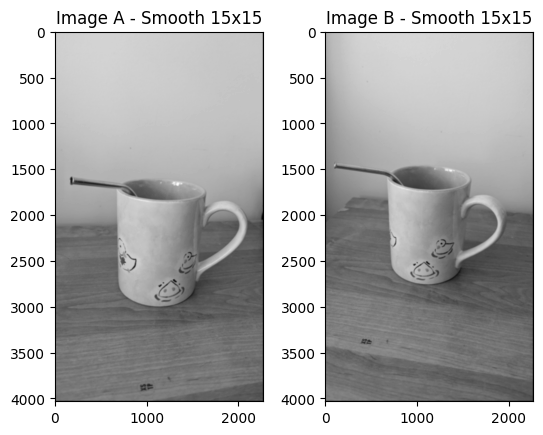

In [32]:
plt.subplot(121), plt.imshow(smooth_A_fifteen, cmap='gray')
plt.title("Image A - Smooth 15x15")
plt.subplot(122), plt.imshow(smooth_B_fifteen, cmap='gray')
plt.title("Image B - Smooth 15x15")
plt.show()

## 5 Compute Image Gradients

Note that when displaying the higher resolution images (the original size smoothed by the 15x15 kernel) the vmin and vmax were set to improve the visibility of the gradient as the range in values were too large.

### Vertical Edge Sobel FIlter

In [19]:
# initializing a 3x3 sobel filter
sobel_x = np.array([[-1, -2, 0, 2, 1],
                    [-2, -3, 0, 3, 2],
                    [-3, -5, 0, 5, 3],
                    [-2, -3, 0, 3, 2],
                    [-1, -2, 0, 2, 1]])

In [20]:
# apply sobel filter on smoothed images
sobel_x_A_five = convolve_img(smooth_A_five, sobel_x)
sobel_x_B_five = convolve_img(smooth_B_five, sobel_x)
sobel_x_A_fifteen = convolve_img(smooth_A_fifteen, sobel_x)
sobel_x_B_fifteen = convolve_img(smooth_B_fifteen, sobel_x)

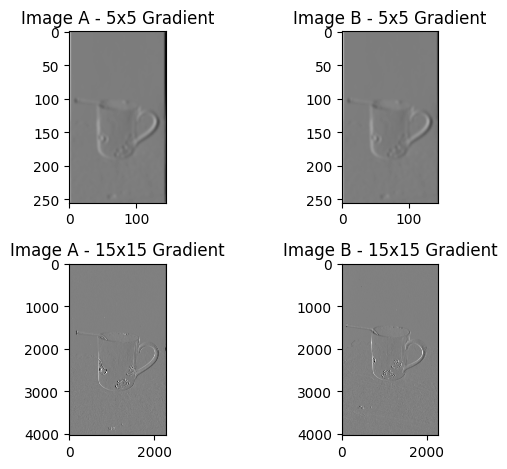

In [21]:
# display images
plt.subplot(221), plt.imshow(sobel_x_A_five, cmap='gray')
plt.title("Image A - 5x5 Gradient")
plt.subplot(222), plt.imshow(sobel_x_A_five, cmap='gray')
plt.title("Image B - 5x5 Gradient")
plt.subplot(223), plt.imshow(sobel_x_A_fifteen, cmap='gray', vmin=-255, vmax=255)
plt.title("Image A - 15x15 Gradient")
plt.subplot(224), plt.imshow(sobel_x_B_fifteen, cmap='gray', vmin=-255, vmax=255)
plt.title("Image B - 15x15 Gradient")
plt.tight_layout()
plt.show()

### Horizontal Edge Sobel Filter

In [22]:
sobel_y = np.array([[1, 2, 3, 2, 1],
                    [2, 3, 5, 3, 2],
                    [0, 0, 0, 0, 0],
                    [-2, -3, -5, -3, -2],
                    [-1, -2, -3, -2, -1]])

In [23]:
# apply sobel filter on images
sobel_y_A_five = convolve_img(smooth_A_five, sobel_y)
sobel_y_B_five = convolve_img(smooth_B_five, sobel_y)
sobel_y_A_fifteen = convolve_img(smooth_A_fifteen, sobel_y)
sobel_y_B_fifteen = convolve_img(smooth_B_fifteen, sobel_y)

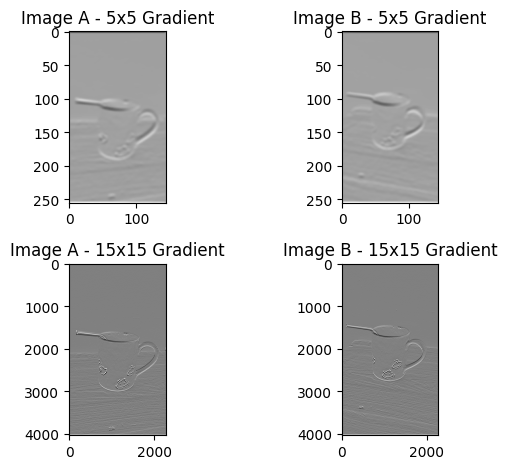

In [24]:
# display images
plt.subplot(221), plt.imshow(sobel_y_A_five, cmap='gray')
plt.title("Image A - 5x5 Gradient")
plt.subplot(222), plt.imshow(sobel_y_B_five, cmap='gray')
plt.title("Image B - 5x5 Gradient")
plt.subplot(223), plt.imshow(sobel_y_A_fifteen, cmap='gray', vmin=-255, vmax=255)
plt.title("Image A - 15x15 Gradient")
plt.subplot(224), plt.imshow(sobel_y_B_fifteen, cmap='gray', vmin=-255, vmax=255)
plt.title("Image B - 15x15 Gradient")
plt.tight_layout()
plt.show()

## 6 Compute the Edge Magnitude and Orientation

### Gradient Magnitude

In [25]:
# function to calculate gradient magnitude over image
def gradient_magnitude(sobel_x, sobel_y):
    result = np.zeros(sobel_x.shape)
    (shape_y, shape_x) = sobel_x.shape

    for x in range(0, shape_x):
      for y in range(0, shape_y):
        result[y,x] = ((sobel_x[y, x] ** 2) + (sobel_y[y, x] ** 2)) ** (0.5)

    return result

In [26]:
# apply magnitude function on images
magnitude_A_five = gradient_magnitude(sobel_x_A_five, sobel_y_A_five)
magnitude_B_five = gradient_magnitude(sobel_x_B_five, sobel_y_B_five)
magnitude_A_fifteen = gradient_magnitude(sobel_x_A_fifteen, sobel_y_A_fifteen)
magnitude_B_fifteen = gradient_magnitude(sobel_x_B_fifteen, sobel_y_B_fifteen)

For the images using the 15x15 smoothing filter. The range of the resulting values were very large and thus if the vmin or vmax were not defined the detected edges would appear very faint. To mitigate this, values for vmin and vmax were set using arbitrary values pictured below.

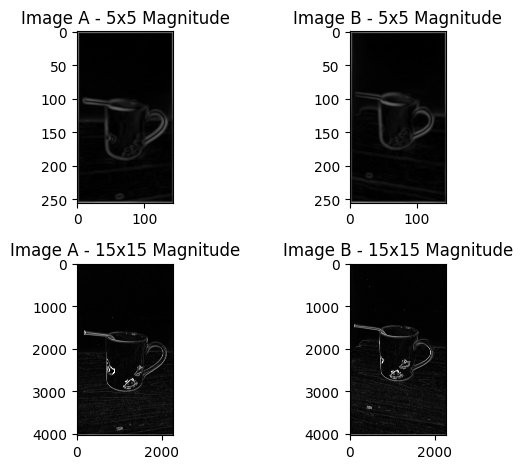

In [31]:
# display images
plt.subplot(221), plt.imshow(magnitude_A_five, cmap='gray')
plt.title("Image A - 5x5 Magnitude")
plt.subplot(222), plt.imshow(magnitude_B_five, cmap='gray')
plt.title("Image B - 5x5 Magnitude")
plt.subplot(223), plt.imshow(magnitude_A_fifteen, cmap='gray', vmin=0, vmax=255)
plt.title("Image A - 15x15 Magnitude")
plt.subplot(224), plt.imshow(magnitude_B_fifteen, cmap='gray', vmin=0, vmax=255)
plt.title("Image B - 15x15 Magnitude")
plt.tight_layout()
plt.show()

### Gradient Orientation

In [28]:
# function to calculate the orientation of image
def gradient_orientation(sobel_x, sobel_y):
    result = np.zeros(sobel_x.shape)
    (shape_y, shape_x) = sobel_x.shape

    for x in range(0, shape_x):
      for y in range(0, shape_y):
        result[y,x] = np.arctan2(sobel_y[y, x], sobel_x[y, x])

    return result

In [29]:
# apply orientation function to images
orientation_A_five = gradient_orientation(sobel_x_A_five, sobel_y_A_five)
orientation_B_five = gradient_orientation(sobel_x_B_five, sobel_y_B_five)
orientation_A_fifteen = gradient_orientation(sobel_x_A_fifteen, sobel_y_A_fifteen)
orientation_B_fifteen = gradient_orientation(sobel_x_B_fifteen, sobel_y_B_fifteen)

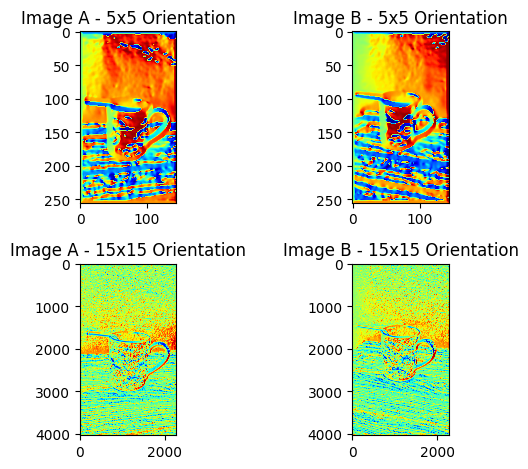

In [30]:
# display images
plt.subplot(221), plt.imshow(orientation_A_five, cmap='jet')
plt.title("Image A - 5x5 Orientation")
plt.subplot(222), plt.imshow(orientation_B_five, cmap='jet')
plt.title("Image B - 5x5 Orientation")
plt.subplot(223), plt.imshow(orientation_A_fifteen, cmap='jet')
plt.title("Image A - 15x15 Orientation")
plt.subplot(224), plt.imshow(orientation_B_fifteen, cmap='jet')
plt.title("Image B - 15x15 Orientation")
plt.tight_layout()
plt.show()